In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

In [5]:
data_path = '/Users/nehapalak/cs3410/Jahnavi_Neha_A1/laptop_price_task/data/Laptop Price Raw.csv'
df = pd.read_csv(data_path)
print("Loaded Raw Dataset:", data_path)

Loaded Raw Dataset: /Users/nehapalak/cs3410/Jahnavi_Neha_A1/laptop_price_task/data/Laptop Price Raw.csv


In [6]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.5kg,52161.120
1,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,14811.840
2,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Linux,2.2kg,14646.672
3,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.42kg,150462.720
4,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,23976.000


In [7]:
df.shape


(1172, 11)

In [8]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
882,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.7kg,85194.72
775,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,95850.72
528,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1172 non-null   object 
 1   TypeName          1172 non-null   object 
 2   Inches            1172 non-null   float64
 3   ScreenResolution  1172 non-null   object 
 4   Cpu               1172 non-null   object 
 5   Ram               1172 non-null   object 
 6   Memory            1172 non-null   object 
 7   Gpu               1172 non-null   object 
 8   OpSys             1172 non-null   object 
 9   Weight            1172 non-null   object 
 10  Price             1172 non-null   float64
dtypes: float64(2), object(9)
memory usage: 100.8+ KB


In [10]:
df.isnull().sum()
# to check if there are any missing values in the columns

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

/var/folders/tp/ggh33ynd5_sdklm6mbr_sdkm0000gn/T/ipykernel_78072/2238232111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df["Price"],


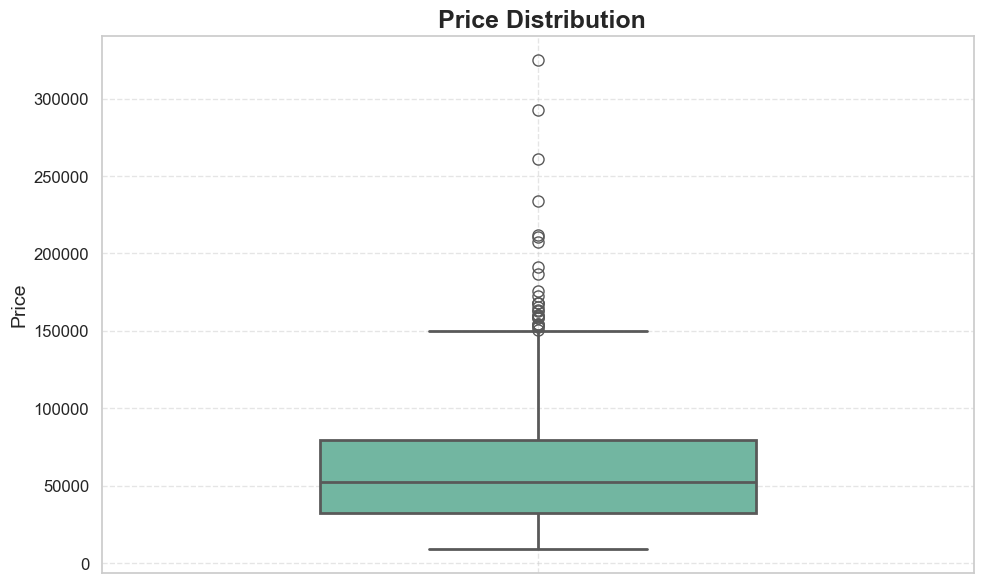

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df["Price"], 
            palette='Set2',  
            linewidth=2,  
            fliersize=8,  
            width=0.5)  


plt.title(' Price Distribution', fontsize=18, fontweight='bold')
plt.ylabel('Price', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

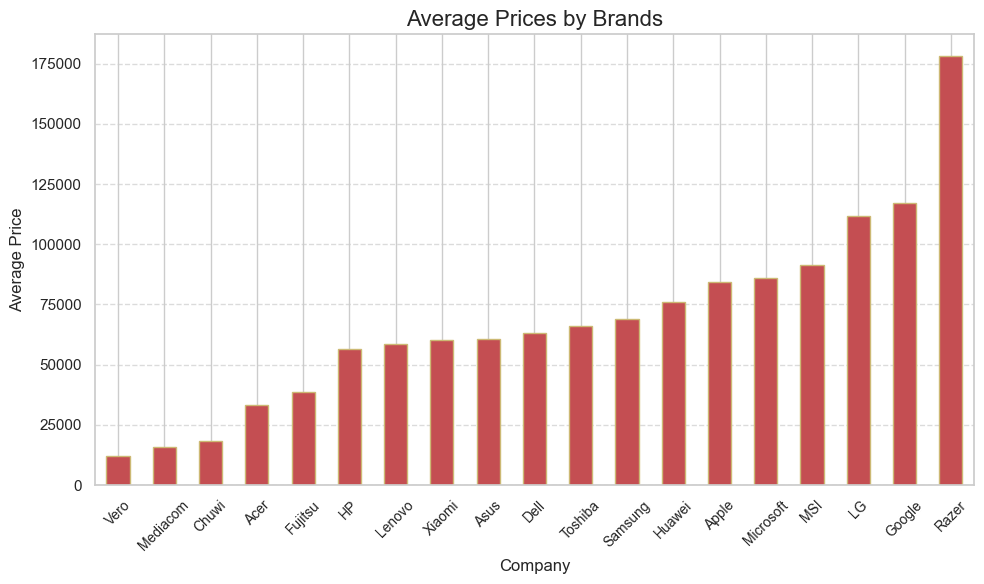

In [14]:
average_prices = df.groupby('Company')['Price'].mean().sort_values()

plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='r', edgecolor='y')

plt.title('Average Prices by Brands', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

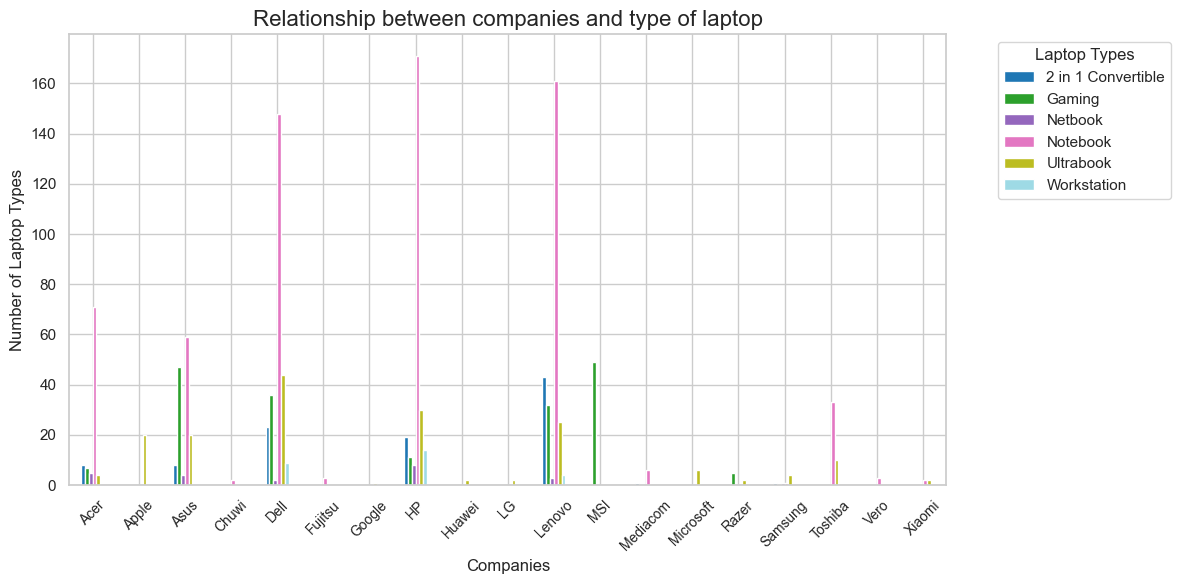

In [16]:
company_type_count = df.groupby(['Company', 'TypeName']).size().unstack(fill_value=0)

company_type_count.plot(kind='bar', figsize=(12, 6), stacked=False, colormap='tab20')

plt.title('Relationship between companies and type of laptop', fontsize=16)
plt.xlabel('Companies', fontsize=12)
plt.ylabel('Number of Laptop Types', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Laptop Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

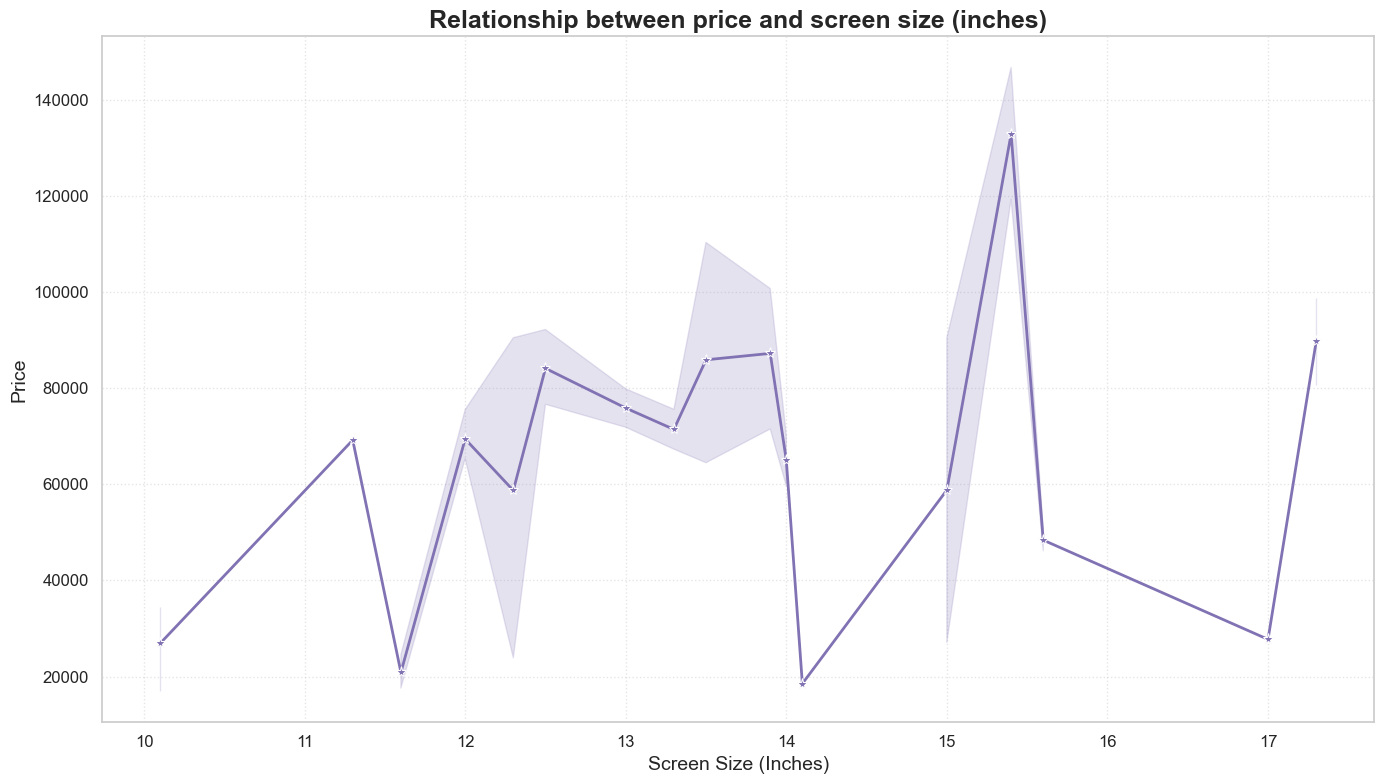

In [18]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=df, x='Inches', y='Price', marker='*', color='m', linewidth=2, markersize=8)

plt.title('Relationship between price and screen size (inches)', fontsize=18, fontweight='bold')
plt.xlabel('Screen Size (Inches)', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Font style and axis settings
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Making the background aesthetic
plt.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()